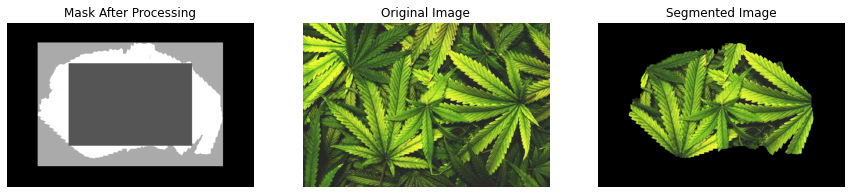

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("cannabis.jpg")
if image is None:
    print("Error: Image not found!")
    exit()

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create an empty mask 
mask = np.full(image.shape[:2], 2, dtype=np.uint8)

# Manually mark the sure background and sure foreground
height, width = image.shape[:2]

# Define sure foreground (flowers) - Approximate center region
mask[height//4: 3*height//4, width//4: 3*width//4] = 1 # Sure foreground

# Define sure background (edges)
mask[:height//8, :] = 0 # Top edge -> Sure background
mask[-height//8:, :] = 0 # Bottom edge -> Sure background
mask[:, :width//8] = 0 # Left edge -> Sure background
mask[:, -width//8:] = 0 # Right edge -> Sure background

# Create models for GrabCut
bg_model = np.zeros((1, 65), np.float64)
fg_model = np.zeros((1, 65), np.float64)

# Apply GrabCut using the manual mask
cv2.grabCut(image, mask, None, bg_model, fg_model, iterCount=5,
            mode=cv2.GC_INIT_WITH_MASK)

# Convert mask: 0,2 -> background (black), 1,3 -> foreground (white)
mask_final = np.where((mask == 1) | (mask == 3), 1, 0).astype("uint8")

# Extract the foreground
segmented_image = image * mask_final[:, :, np.newaxis]

# Display results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(mask, cmap='gray')
ax[0].set_title("Mask After Processing")
ax[0].axis("off")

ax[1].imshow(image)
ax[1].set_title("Original Image")
ax[1].axis("off")

ax[2].imshow(segmented_image)
ax[2].set_title("Segmented Image")
ax[2].axis("off")

plt.show()
